# Analyze participants

By Ben Welsh

Analyzes the activity of participants in the California Civic Data Coalition's open-source projects.

In [13]:
import os
import math
import time
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from selenium import webdriver
import matplotlib.pyplot as plt
from IPython.core.display import Image

/home/palewire/.virtualenvs/python-calaccess-notebooks/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [15]:
pd.options.display.max_rows = 5000
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [16]:
sns.set(color_codes=True)

In [17]:
%matplotlib inline

In [18]:
this_dir = os.getcwd()
output_dir = os.path.join(this_dir, 'output')

In [19]:
participants = pd.read_csv(os.path.join(output_dir, "participants.csv"))

## GitHub totals 

In [20]:
unique_contributors = participants[participants.contributions > 0]

In [21]:
total_contributors = len(unique_contributors)
total_contributors

144

In [22]:
total_contributions = unique_contributors.contributions.sum()
total_contributions

5416

In [23]:
unique_contributors.contributions.describe()

count    144.00
mean      37.61
std      268.81
min        1.00
25%        1.00
50%        2.00
75%        4.00
max     2932.00
Name: contributions, dtype: float64

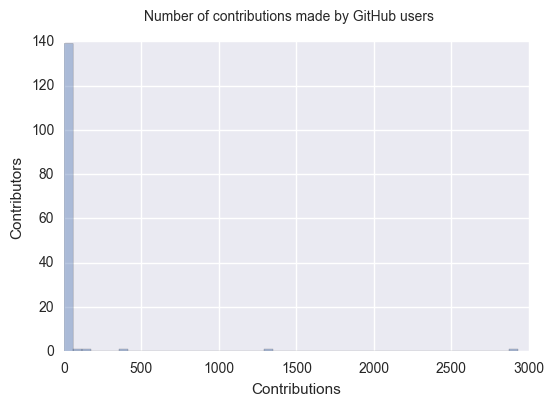

In [37]:
fig = plt.figure()
sns.distplot(unique_contributors.contributions, kde=False)
fig.suptitle("Number of contributions made by GitHub users")
plt.ylabel('Contributors')
plt.xlabel('Contributions')

## GitHub rankings

In [39]:
def rank_by_contributors(table, field):
    grouped = table.groupby(field, as_index=False)
    summed = grouped.login.count()
    summed.columns = [field, 'count']
    return summed

In [40]:
def rank_by_contributions(table, field):
    grouped = table.groupby(field, as_index=False)
    return grouped.contributions.sum()

In [41]:
def create_ranking(table, field):
    count = rank_by_contributors(table, field)
    summed = rank_by_contributions(table, field)
    merged = count.merge(summed)
    merged['count_percent'] = merged['count'] / total_contributors
    merged['contributions_percent'] = merged['contributions'] / total_contributions
    return merged.sort_values("contributions", ascending=False)

In [42]:
top_names = create_ranking(unique_contributors, 'name')[['name', 'contributions', 'contributions_percent']]
top_names.head(20)

,name,contributions,contributions_percent
18,Ben Welsh,2932,0.54
59,James Gordon,1329,0.25
0,Aaron Williams,379,0.07
117,Sahil Chinoy,126,0.02
1,Agustin Armendariz,69,0.01
20,Bill Chambers,47,0.01
13,Anthony Pesce,40,0.01
24,Casey Miller,33,0.01
72,Juan Elosua,29,0.01
88,Luciana Godoy,25,0.00


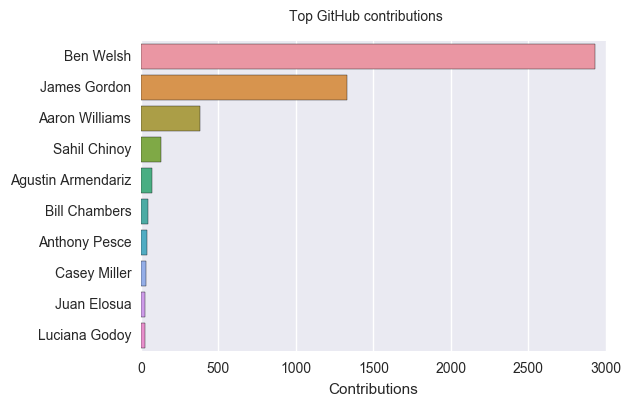

In [66]:
fig = plt.figure()
sns.barplot(y="name", x="contributions", data=top_names.head(10))
fig.suptitle("Top GitHub contributors")
plt.ylabel('')
plt.xlabel('Contributions')

In [54]:
top_companies = create_ranking(unique_contributors, 'company')
top_companies.head(20)

,company,count,contributions,count_percent,contributions_percent
42,Los Angeles Times,16,3016,0.11,0.56
14,California Civic Data Coalition,1,1329,0.01,0.25
78,Washington Post,3,387,0.02,0.07
69,UC Berkeley,1,126,0.01,0.02
49,New York Times,4,73,0.03,0.01
44,Mozilla OpenNews,7,47,0.05,0.01
22,Databricks,1,47,0.01,0.01
76,Vox Media,2,36,0.01,0.01
46,NPR,1,29,0.01,0.01
70,UC San Diego,1,20,0.01,0.00


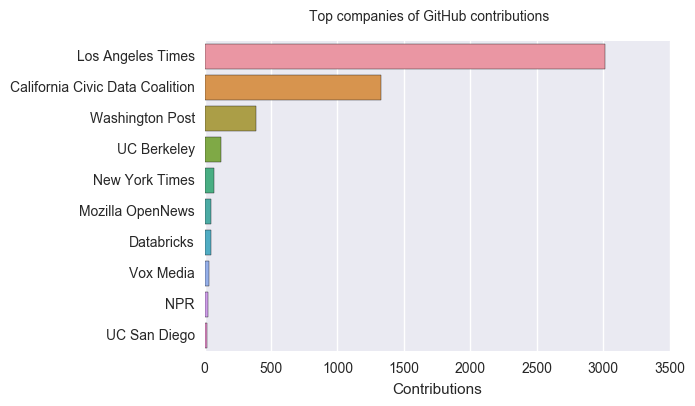

In [65]:
fig = plt.figure()
sns.barplot(y="company", x="contributions", data=top_companies.head(10))
fig.suptitle("Top companies of GitHub contributions")
plt.ylabel('')
plt.xlabel('Contributions')

In [58]:
top_locations = create_ranking(unique_contributors, 'location')
top_locations.head(20)

,location,count,contributions,count_percent,contributions_percent
25,"Los Angeles, CA",19,3023,0.13,0.56
11,"Columbia, MO",3,1331,0.02,0.25
47,"Washington, DC",15,428,0.10,0.08
4,"Berkeley, CA",4,176,0.03,0.03
28,"New York, NY",19,167,0.13,0.03
10,"Chicago, IL",6,31,0.04,0.01
7,"Buenos Aires, Argentina",5,30,0.03,0.01
37,"San Francisco, CA",8,27,0.06,0.00
36,"San Diego, CA",1,20,0.01,0.00
3,"Austin, TX",4,15,0.03,0.00


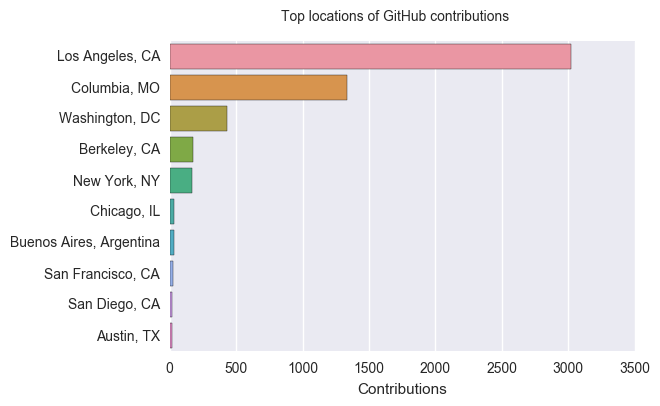

In [64]:
fig = plt.figure()
sns.barplot(y="location", x="contributions", data=top_locations.head(10))
fig.suptitle("Top locations of GitHub contributions")
plt.ylabel('')
plt.xlabel('Contributions')

In [60]:
location_map_data = top_locations.merge(
    unique_contributors.groupby(['location', 'location_x', 'location_y']).size().reset_index()
)

In [61]:
def calculate_radius(column, value, scale=300000):
    max_value = location_map_data[column].max()
    return math.sqrt(float(value) / max_value) * scale

In [62]:
def screenshot_map(name):
    url = "file://{}/{}.html".format(output_dir, name)
    outfn = os.path.join(output_dir, "{}.png".format(name))
    browser = webdriver.Firefox()
    browser.set_window_size(1200, 750)
    browser.get(url)
    time.sleep(2)
    browser.save_screenshot(outfn)
    browser.quit()

In [63]:
contributor_map = folium.Map(location=[35, -102], zoom_start=2, tiles="Mapbox Bright")
for i, row in location_map_data.iterrows():
    radius = calculate_radius('count', row['count'])
    folium.CircleMarker([row.location_y, row.location_x],
        radius=radius,
        popup=row.location.decode("utf-8"),
        color='#3186cc',
        fill_color='#3186cc',
        fill_opacity=0.25,
    ).add_to(contributor_map)

In [336]:
contributor_map.save(os.path.join(output_dir, "contributor_map.html"))

In [337]:
screenshot_map("contributor_map")

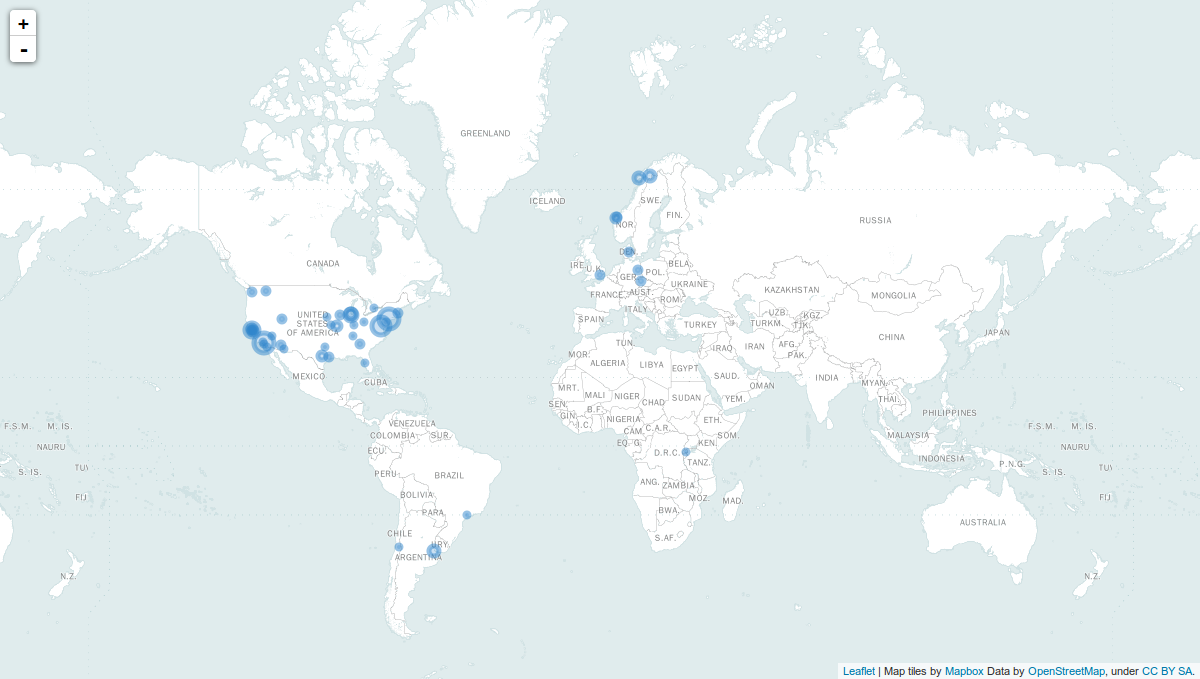

In [338]:
Image(os.path.join(output_dir, "contributor_map.png"))

In [339]:
contributions_map = folium.Map(location=[35, -102], zoom_start=2, tiles="Mapbox Bright")
for i, row in location_map_data.iterrows():
    radius = calculate_radius('contributions', row['contributions'])
    folium.CircleMarker([row.location_y, row.location_x],
        radius=radius,
        popup=row.location.decode("utf-8"),
        color='#3186cc',
        fill_color='#3186cc',
        fill_opacity=0.25,
    ).add_to(contributions_map)

In [340]:
contributions_map.save(os.path.join(output_dir, "contributions_map.html"))

In [341]:
screenshot_map("contributions_map")

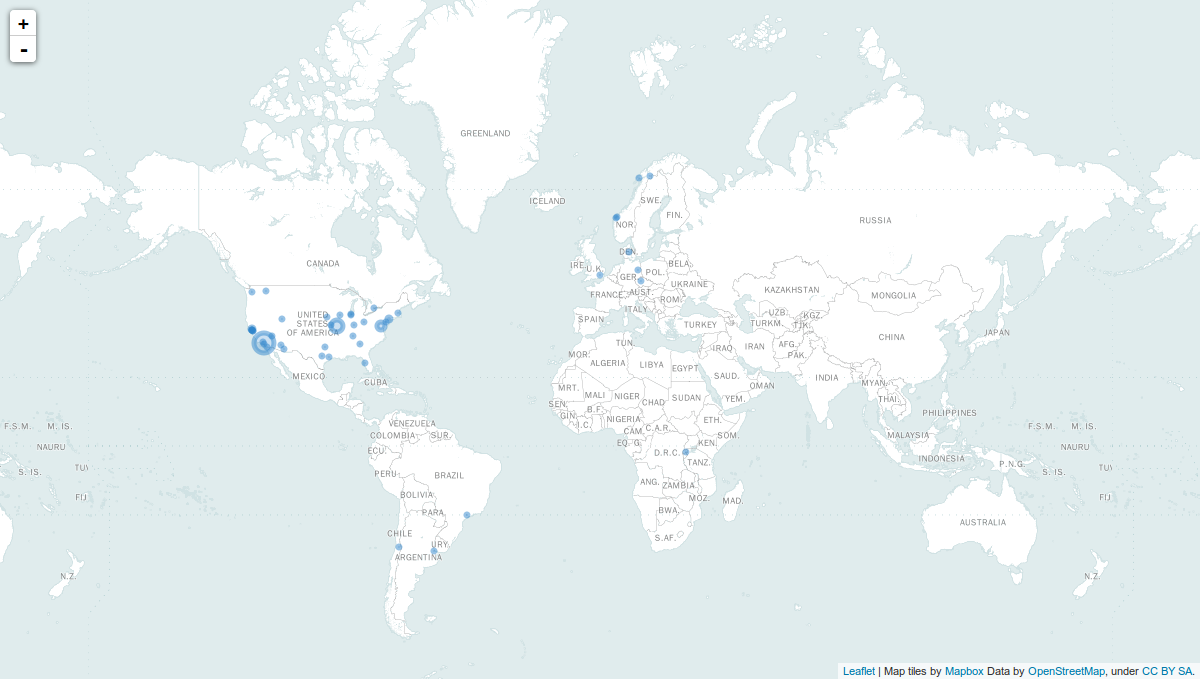

In [342]:
Image(os.path.join(output_dir, "contributions_map.png"))

In [343]:
create_ranking(unique_contributors, 'in_coalition').head(20)

,in_coalition,count,contributions,count_percent,contributions_percent
1,True,7,4847,0.05,0.89
0,False,137,569,0.95,0.11


In [344]:
create_ranking(unique_contributors, 'in_california').head(20)

,in_california,count,contributions,count_percent,contributions_percent
1,True,41,3271,0.28,0.60
0,False,103,2145,0.72,0.40


In [345]:
create_ranking(unique_contributors, 'in_usa').head(20)

,in_usa,count,contributions,count_percent,contributions_percent
1,True,114,5325,0.79,0.98
0,False,15,52,0.10,0.01


In [346]:
create_ranking(unique_contributors, 'state').head(20)

,state,count,contributions,count_percent,contributions_percent
1,CA,41,3271,0.28,0.60
9,MO,4,1332,0.03,0.25
2,DC,15,428,0.10,0.08
12,NY,19,167,0.13,0.03
6,IL,9,38,0.06,0.01
16,TX,7,19,0.05,0.00
10,NE,1,12,0.01,0.00
19,WA,2,9,0.01,0.00
3,FL,1,9,0.01,0.00
13,OH,1,7,0.01,0.00


In [347]:
create_ranking(unique_contributors, 'country').head(20)

,country,count,contributions,count_percent,contributions_percent
9,United States of America,114,5325,0.79,0.98
0,Argentina,5,30,0.03,0.01
8,Rwanda,1,11,0.01,0.00
4,Czech Republic,1,9,0.01,0.00
7,Norway,4,4,0.03,0.00
1,Brazil,1,2,0.01,0.00
2,Canada,1,2,0.01,0.00
3,Chile,1,1,0.01,0.00
5,Denmark,1,1,0.01,0.00
6,Germany,1,1,0.01,0.00
